# ML model examples

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

## Dimension reduction

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
bc = load_breast_cancer(as_frame=True)

In [4]:
bc.data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
bc.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [7]:
%%capture

! python3 -m pip install --quiet umap-learn
! python3 -m pip install --quiet phate

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [9]:
dr_models = {
    'PCA': PCA(),
    't-SNE': TSNE(),
    'UMAP': UMAP(),
}

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


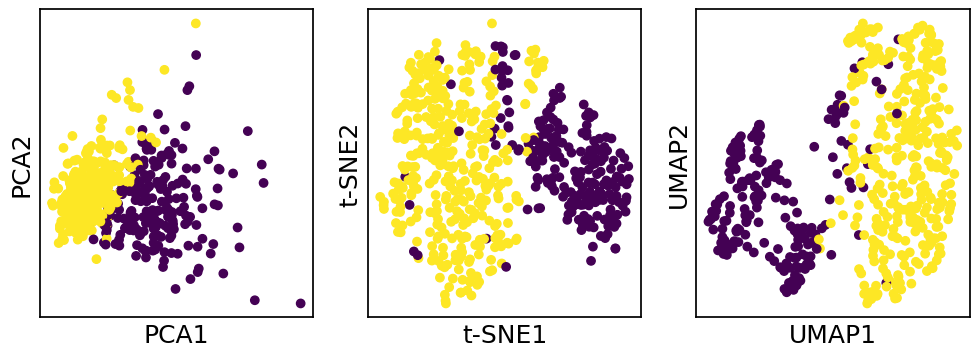

In [12]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
axes = axes.ravel()

for i, (k, v) in enumerate(dr_models.items()):
    X = v.fit_transform(scaler.fit_transform(bc.data))
    target = bc.target
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=target)
    ax.set_xlabel(f'{k}1')
    ax.set_ylabel(f'{k}2')
    ax.set_xticks([])
    ax.set_yticks([])

#### A3.2 Clustering

- K-means
- Agglomerative hierarchical clustering
- Mixture models

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [14]:
cl_models = {
    'true': None,
    'k-means': KMeans(n_clusters=2),
    'ahc': AgglomerativeClustering(n_clusters=2),
    'gmm': GaussianMixture(n_components=2),
}

In [15]:
pca = PCA()
X = pca.fit_transform(scaler.fit_transform(bc.data))

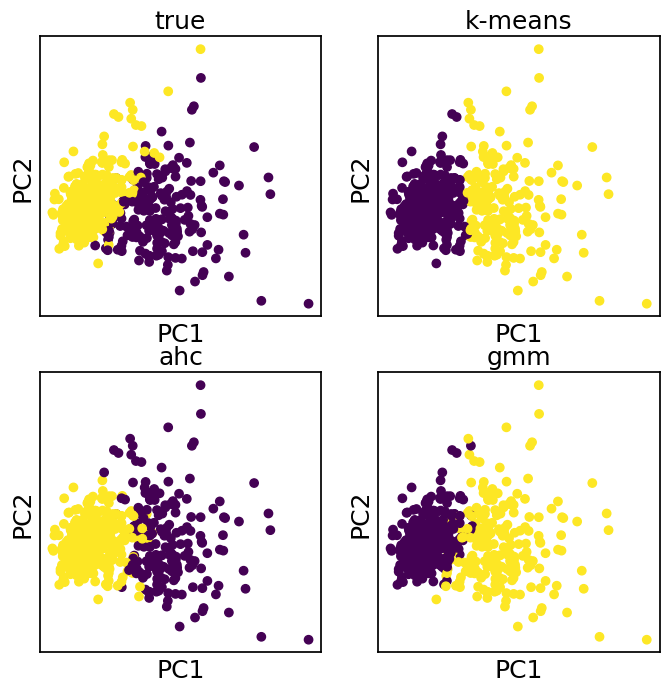

In [16]:
fig, axes = plt.subplots(2,2,figsize=(8, 8))
axes = axes.ravel()

for i, (k, v) in enumerate(cl_models.items()):
    if i == 0:
        y = bc.target
    else:
        y = v.fit_predict(scaler.fit_transform(bc.data))
    target = y
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=target)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(k)

#### A3.3 Supervised learning

- Nearest neighbor
![img](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)
- Linear models
![img](https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png)
- Support vector machines
![img](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)
- Trees
![img](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/02/Example-Decision-Tree.png)
- Neural networks
![img](https://ml-cheatsheet.readthedocs.io/en/latest/_images/dynamic_resizing_neural_network_4_obs.png)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

### Proprocess data

In [19]:
X = bc.data
y = bc.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
pd.Series(y_test).value_counts(normalize=True)

target
1    0.629371
0    0.370629
Name: proportion, dtype: float64

In [25]:
sl_modles = dict(
    dummy = DummyClassifier(strategy='prior'),
    knn = KNeighborsClassifier(),
    lr = LogisticRegression(),
    svc = SVC(),
    nn = MLPClassifier(max_iter=500),
)

In [26]:
for name, clf in sl_modles.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'{name}: {score:.3f}')

dummy: 0.629
knn: 0.951
lr: 0.958
svc: 0.958
nn: 0.965
